In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
def get_pareto_front(points, goal=None):
    """
    Returns pareto front from a list of coordinates.
    
    Parameters:
        points (list) - list of lists containing coordinates in the objective-space
        goal (list) - list of optimization goals for each dimension in the objective-space. if a dimension is marked true, the goal is to maximize that dimension
                
    Returns:
        cleared (np array) - array of pareto optimal coordinates in the objective-space
        dominated (np array) - array of non-pareto-optimal coordinates
    """
    
    # define max and min functions
    strategies = {True : lambda x, y: x >= y, False : lambda x, y: x <= y}

    # set strategy for each dimension in objective-space
    if goal is None:
        # if no goal is provided, assume goal is to maximize all dimensions
        comparison = {i: strategies[True] for i in range(0, len(points[0]))}
    elif len(goal) == len(points[0]):
        comparison = {i: strategies[goal[i]] for i in range(0, len(points[0]))}
    else:
        print('Error: optimization goal vector is the wrong dimension')

    # define function to check if p1 dominates p2
    dominates = lambda p1, p2: all(comparison[i](x1, x2) for i, (x1, x2) in enumerate(zip(p1, p2)))    
        
    # classify all points as included/excluded from front
    cleared, dominated = cull(points, dominates)
    
    return cleared, dominated
    

def cull(points, dominates):
    
    """
    Culling function for pareto front, based on code from Yakym Pirozhenko at stack overflow
    
    Parameters:
        points (list) - list of lists containing coordinates in the objective-space
        dominates (foo) - boolean function evaluating whether one point dominates another
    """
    
    dominated = [] # points that are not pareto-optimal
    cleared = [] # pareto front
    remaining = points # comparison set
    
    # iterate until all points have been processed
    while len(remaining) > 0:
        
        # select a candidate point for inclusion in the pareto front
        candidate = remaining[0]
        new_remaining = []
        
        # compare candidate point with all other points in the comparison set
        for other in remaining[1:]:
            
            # if candidate point dominates the other point, add other point to dominated, otherwise retain it for comparison
            [new_remaining, dominated][dominates(candidate, other)].append(other)
        
        # check if any of the points in the comparison set dominate the candidate point
        if not any(dominates(other, candidate) for other in new_remaining):
            
            # if no points in the comparison set dominate the candidate point, add it to the pareto front
            cleared.append(candidate)
        
        else:
            # if other points in the comparison set dominate the cadidate point, reject it
            dominated.append(candidate)
            
        remaining = new_remaining
        
    return np.array(cleared), np.array(dominated)

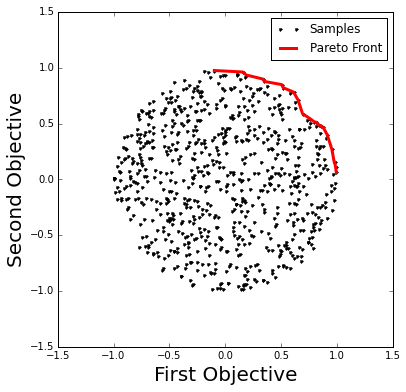

In [6]:
# set optimization goal (i.e. True = max, False = min) for each dimension in objective-space
goal = [True, True]


plt.figure(figsize=(6, 6))
ax = plt.gca()

# generate and plot random points in unit circle
points = []
for _ in range(0, 1000):
    x, y = rd.random()*rd.sample([-1, 1], k=1)[0], rd.random()*rd.sample([-1, 1], k=1)[0]
    if x**2+y**2 < 1:
        points.append([x, y])    
plt.plot(np.array(points)[:, 0], np.array(points)[:, 1], '.k', label='Samples')

# _ = [ax.plot(row[0], row[1], '.r') for row in points]
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# find and plot pareto front
cleared, dominated = get_pareto_front(points, goal)
cleared = cleared[cleared[:,0].argsort()]
ax.plot(cleared[:, 0], cleared[:, 1], '-r', linewidth=3, markersize=15, label='Pareto Front')

ax.set_xlabel('First Objective', fontsize=20)
ax.set_ylabel('Second Objective', fontsize=20)
_ = ax.legend(loc=0)

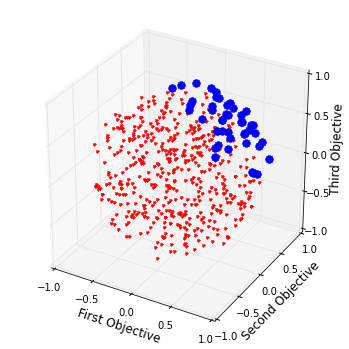

In [52]:
# set optimization goal (i.e. True = max, False = min) for each dimension in objective-space
goal = [True, True, True]


# create 3D axes
fig2 = plt.figure(figsize=(6, 6))
ax2 = fig2.add_subplot(111, projection='3d')

# generate random points in unit sphere
points = []
for _ in range(0, 1000):
    x, y, z = rd.random()*rd.sample([-1, 1], k=1)[0], rd.random()*rd.sample([-1, 1], k=1)[0], rd.random()*rd.sample([-1, 1], k=1)[0]
    if x**2+y**2+z**2 < 1:
        points.append([x, y, z])    

# plot points in 3-D        
ax2.plot(np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2], '.r', label='Samples')


# find and plot pareto front
cleared, dominated = get_pareto_front(points, goal)
cleared = cleared[cleared[:,0].argsort()]
ax2.plot(cleared[:, 0], cleared[:, 1], cleared[:, 2], '.', markersize=15, label='Pareto Front')

ax2.set_xlabel('First Objective', fontsize=12)
ax2.set_ylabel('Second Objective', fontsize=12)
ax2.set_zlabel('Third Objective', fontsize=12)
_ = ax.legend(loc=0)